In [1]:
!pip install --user fbprophet

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

## Data

In [2]:
!ls

ARIMA TimeSeries Forecasting-Copy1.ipynb
ARIMA TimeSeries Forecasting-Copy2.ipynb
ARIMA TimeSeries Forecasting-Copy3.ipynb
ARIMA TimeSeries Forecasting.ipynb
ARIMA TimeSeries Forecasting.pdf
cleaned_data
eda and time series prediction.ipynb
Historical Pollen Index
Historical Pollution Index
Historical Symptom Logs
__MACOSX
method_1_ARIMA_timeseries_prediction_sample.ipynb
pollen.csv
pollen_history.csv
symptom_cause_2019051616-03_001.csv
weatherStored_2019051615-59_001.csv


In [2]:
data = pd.read_csv('pollen.csv', index_col=[0], parse_dates=[0])

In [3]:
data.columns = ['date', 'pollen']

In [4]:
data.head()

,date,pollen
0,2017-09-06 14:00:00,1
1,2017-09-06 15:00:00,9
2,2017-09-06 16:00:00,9
3,2017-09-06 17:00:00,9
4,2017-09-06 18:00:00,9


In [5]:
print(data['date'].min() + "  " + data['date'].max())

2017-09-06 14:00:00  2019-05-20 11:00:00


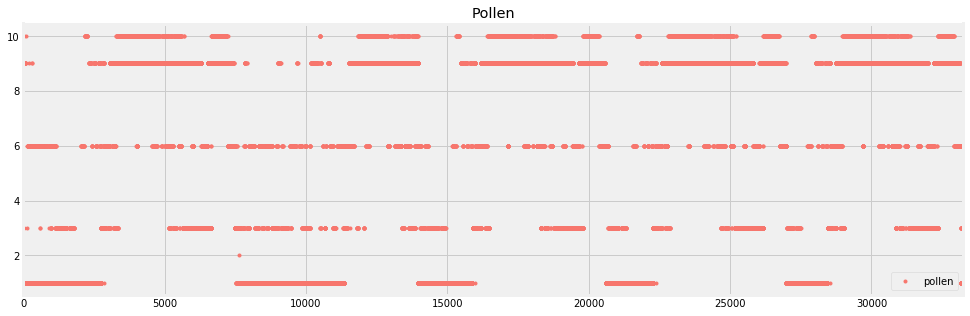

In [6]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='.', figsize=(15,5), color=color_pal[0], title='Pollen')

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', format = '%Y-%m-%d %H:%M:%S')

In [8]:
data = data.copy()

In [9]:
data = data[10:]

In [10]:
data.head()

,date,pollen
10,2017-09-07 00:00:00,1
11,2017-09-07 01:00:00,1
12,2017-09-07 02:00:00,1
13,2017-09-07 03:00:00,1
14,2017-09-07 04:00:00,1


In [11]:
data['hour'] = data['date'].dt.hour

In [12]:
data['dayofweek'] = data['date'].dt.dayofweek

In [13]:
data['quarter'] = data['date'].dt.quarter

In [14]:
data['month'] = data['date'].dt.month

In [15]:
data['year'] = data['date'].dt.year

In [16]:
data['dayofmonth'] = data['date'].dt.day

In [17]:
data['weekofyear'] = data['date'].dt.weekofyear

data['date'] = data.index

In [18]:
data.head(20)

,date,pollen,hour,dayofweek,quarter,month,year,dayofmonth,weekofyear
10,2017-09-07 00:00:00,1,0,3,3,9,2017,7,36
11,2017-09-07 01:00:00,1,1,3,3,9,2017,7,36
12,2017-09-07 02:00:00,1,2,3,3,9,2017,7,36
13,2017-09-07 03:00:00,1,3,3,3,9,2017,7,36
14,2017-09-07 04:00:00,1,4,3,3,9,2017,7,36
15,2017-09-07 05:00:00,1,5,3,3,9,2017,7,36
16,2017-09-07 06:00:00,1,6,3,3,9,2017,7,36
17,2017-09-07 07:00:00,1,7,3,3,9,2017,7,36
18,2017-09-07 08:00:00,1,8,3,3,9,2017,7,36
19,2017-09-07 09:00:00,1,9,3,3,9,2017,7,36


In [19]:
data['date'].head()

10   2017-09-07 00:00:00
11   2017-09-07 01:00:00
12   2017-09-07 02:00:00
13   2017-09-07 03:00:00
14   2017-09-07 04:00:00
Name: date, dtype: datetime64[ns]

In [20]:
data.set_index('date', inplace=True)

In [21]:
data.head()

,pollen,hour,dayofweek,quarter,month,year,dayofmonth,weekofyear
date,,,,,,,,
2017-09-07 00:00:00,1,0,3,3,9,2017,7,36
2017-09-07 01:00:00,1,1,3,3,9,2017,7,36
2017-09-07 02:00:00,1,2,3,3,9,2017,7,36
2017-09-07 03:00:00,1,3,3,3,9,2017,7,36
2017-09-07 04:00:00,1,4,3,3,9,2017,7,36


## 

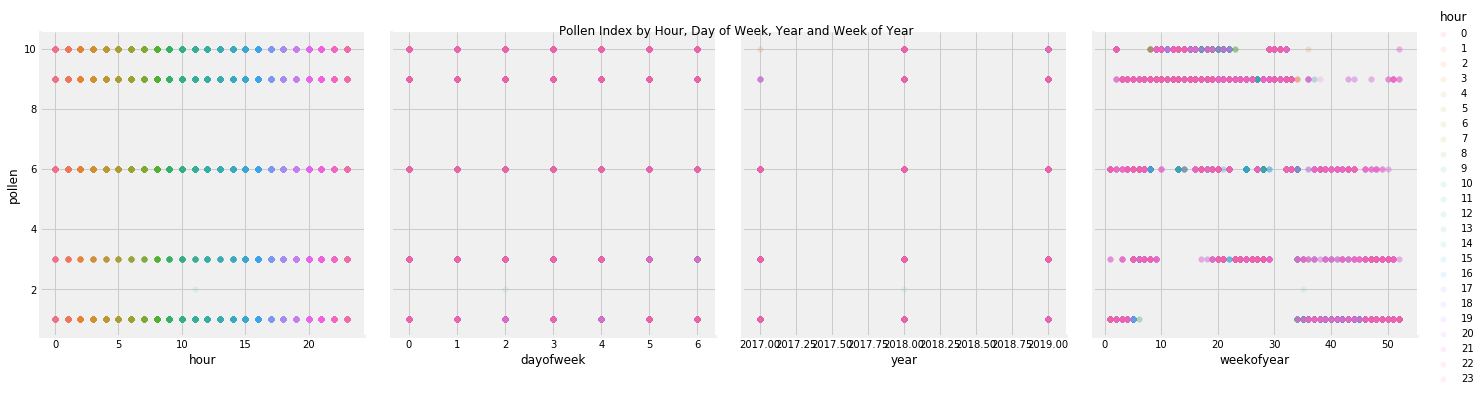

In [22]:
sns.pairplot(data.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek','year','weekofyear'],
             y_vars='pollen',
             height=5,
             plot_kws={'alpha':0.1, 'linewidth':0}
            )
plt.suptitle('Pollen Index by Hour, Day of Week, Year and Week of Year')
plt.show()


In [23]:
split_date = '01-Jan-2019'

In [24]:
train = data.loc[data.index <= split_date].copy()

In [25]:
test = data.loc[data.index > split_date].copy()

_ = test \
    .rename(columns={'pollen': 'TEST SET'}) \
    .join(train.rename(columns={'pollen': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Pollen Index', style='.')

In [26]:
# Format data for prophet model using ds and y
train.reset_index().rename(columns={'date':'ds', 'pollen':'y'}).head()

,ds,y,hour,dayofweek,quarter,month,year,dayofmonth,weekofyear
0,2017-09-07 00:00:00,1,0,3,3,9,2017,7,36
1,2017-09-07 01:00:00,1,1,3,3,9,2017,7,36
2,2017-09-07 02:00:00,1,2,3,3,9,2017,7,36
3,2017-09-07 03:00:00,1,3,3,3,9,2017,7,36
4,2017-09-07 04:00:00,1,4,3,3,9,2017,7,36


In [27]:
# Setup and train model
model = Prophet()
model.fit(train.reset_index().rename(columns={'date':'ds', 'pollen':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
# Predict on training set with model
test_fcst = model.predict(df=test.reset_index().rename(columns={'date':'ds'}))

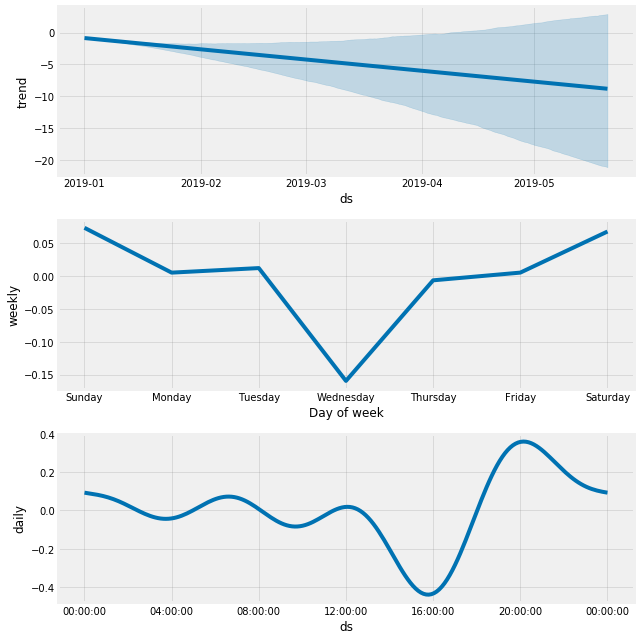

In [29]:
# Plot the components
fig = model.plot_components(test_fcst)

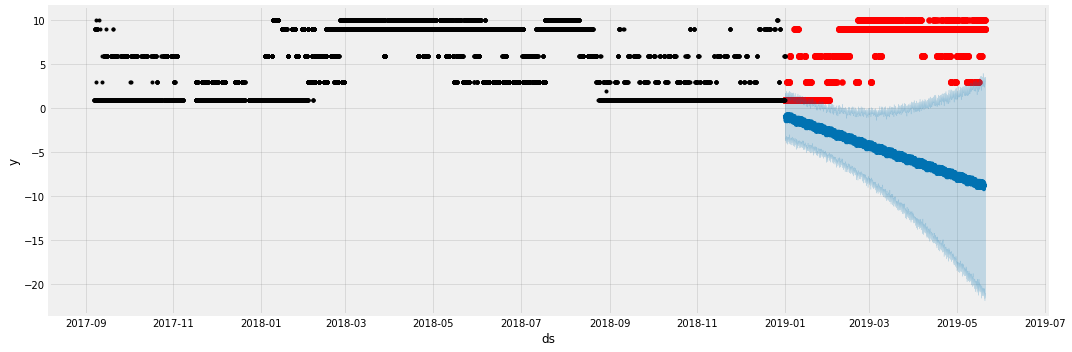

In [30]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.index, test['pollen'], color='r')
fig = model.plot(test_fcst, ax=ax)

https://rdrr.io/cran/prophet/man/make_future_dataframe.html

In [44]:
future = model.make_future_dataframe(periods=10)

In [45]:
future.head()

,ds
0,2017-09-07 00:00:00
1,2017-09-07 01:00:00
2,2017-09-07 02:00:00
3,2017-09-07 03:00:00
4,2017-09-07 04:00:00


In [46]:
forecast = model.predict(future)

In [47]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
29884,2019-01-07,-1.203720,-1.225738,-1.185350,-3.617968,1.299376,0.098217,0.098217,0.098217,0.092666,0.092666,0.092666,0.0,0.0,0.0,0.005552,0.005552,0.005552,-1.105502
29885,2019-01-08,-1.260683,-1.297889,-1.224512,-3.528011,1.531563,0.105157,0.105157,0.105157,0.092666,0.092666,0.092666,0.0,0.0,0.0,0.012492,0.012492,0.012492,-1.155525
29886,2019-01-09,-1.317646,-1.377110,-1.263011,-3.966033,0.998080,-0.066934,-0.066934,-0.066934,0.092666,0.092666,0.092666,0.0,0.0,0.0,-0.159599,-0.159599,-0.159599,-1.384580
29887,2019-01-10,-1.374610,-1.461190,-1.295011,-4.000985,1.235981,0.086469,0.086469,0.086469,0.092666,0.092666,0.092666,0.0,0.0,0.0,-0.006197,-0.006197,-0.006197,-1.288141
29888,2019-01-11,-1.431573,-1.543951,-1.317036,-3.855967,1.336201,0.098248,0.098248,0.098248,0.092666,0.092666,0.092666,0.0,0.0,0.0,0.005583,0.005583,0.005583,-1.333325


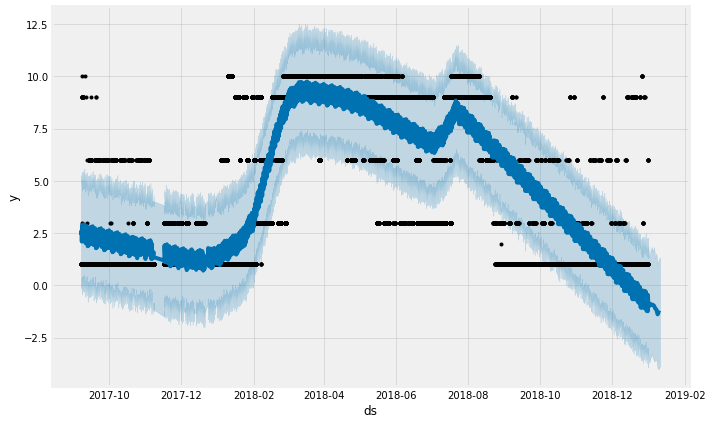

In [48]:
fig = model.plot(forecast)